**Description:-** 

House price prediction is a common problem in the real estate industry and
involves predicting the selling price of a house based on various features and attributes. The
problem is typically approached as a regression problem, where the target variable is the price
of the house, and the features are various attributes of the house
The features used in house price prediction can include both quantitative and categorical
variables, such as the number of bedrooms, house area, bedrooms, furnished, nearness to
main road, and various amenities such as a garage and other factors that may influence the
value of the property.

Accurate predictions can help agents and appraisers price homes correctly, while
homeowners can use the predictions to set a reasonable asking price for their properties.
Accurate house price prediction can also be useful for buyers who are looking to make
informed decisions about purchasing a property and obtaining a fair price for their
investment.

**Attribute Information:**

* Price-Prices of the houses
* Area- Area of the houses
* Bedrooms- No of house bedrooms
* Bathrooms- No of bathrooms
* Stories- No of house stories
* Main Road- Weather connected to Main road
* Guestroom-Weather has a guest room
* Basement-Weather has a basement
* Hot water heating- Weather has a hot water heater
* Airconditioning-Weather has a air conditioner
* Parking- No of house parking
* Furnishing Status-Furnishing status of house

**Importing all the Libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import plotly.offline as py
from scipy import stats

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Loading the Data**

In [23]:
df=pd.read_csv('/kaggle/input/housingregression/Housing.csv')


In [24]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


**Observations:-**

-there are 20,640 instance in the dataset 

-bedrooms 20433 only rest 207 NA

-ocean is objet

In [26]:
#describe will show the summary of numerical data

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

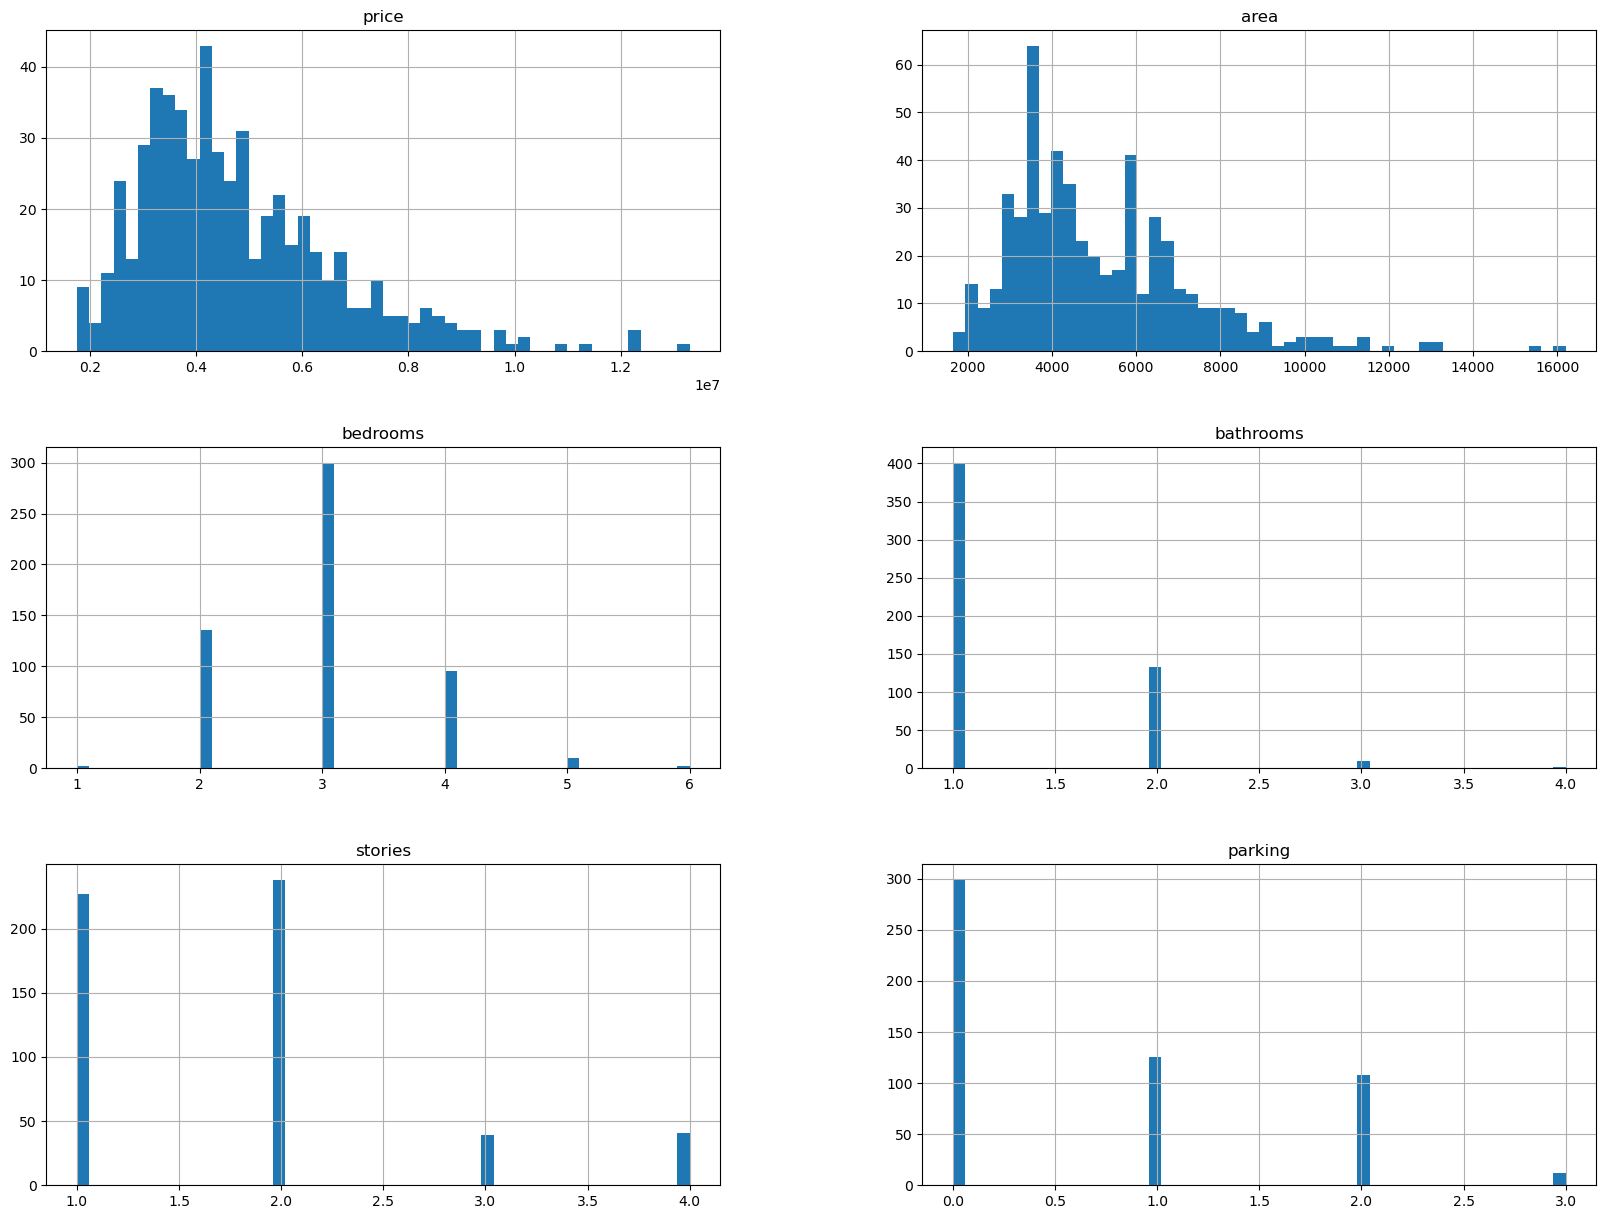

In [27]:
#lets plot a histogram for no. of instances

df.hist(bins=50,figsize=(20,15))

In [28]:
#Identifying numerical and categorical features in dataframe
numerical_variables = []
categorical_variables = []
for x in df.columns:
    if len(df[x].value_counts()) < 4:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [29]:
categorical_variables


['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'furnishingstatus']

In [30]:
numerical_variables


['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

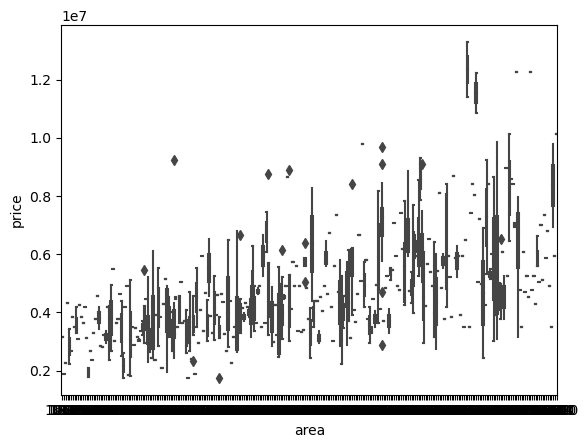

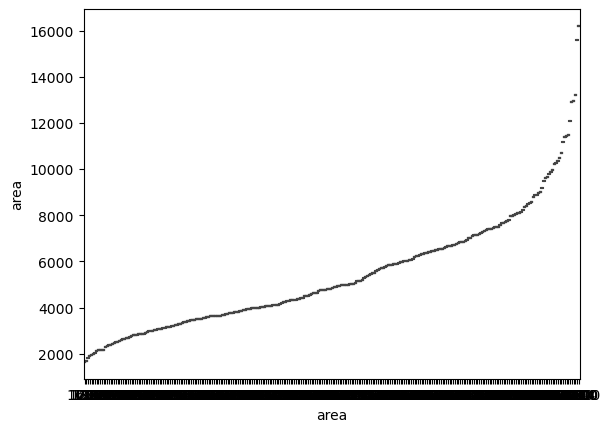

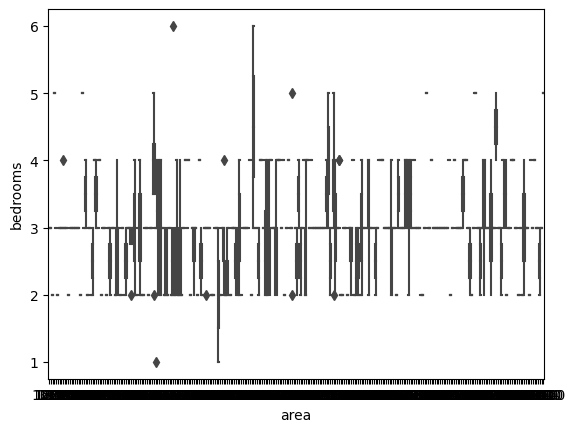

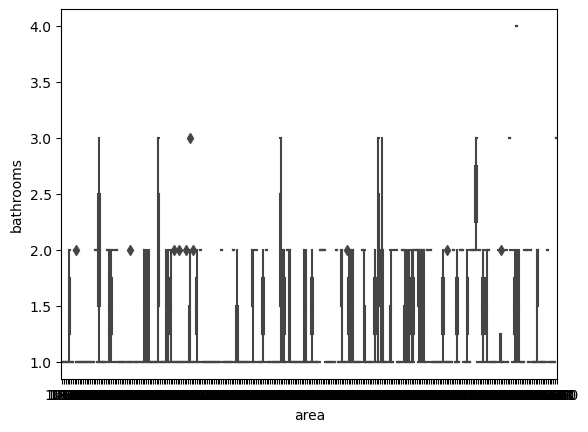

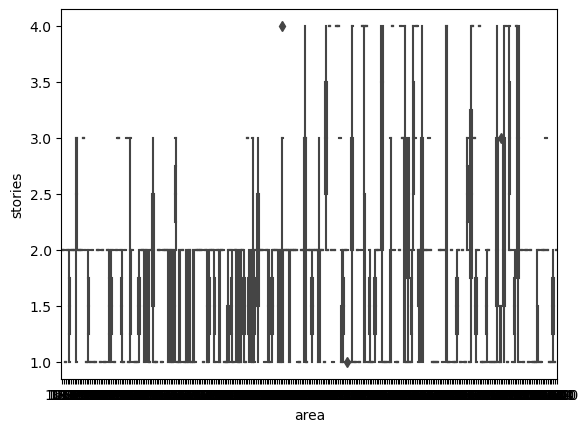

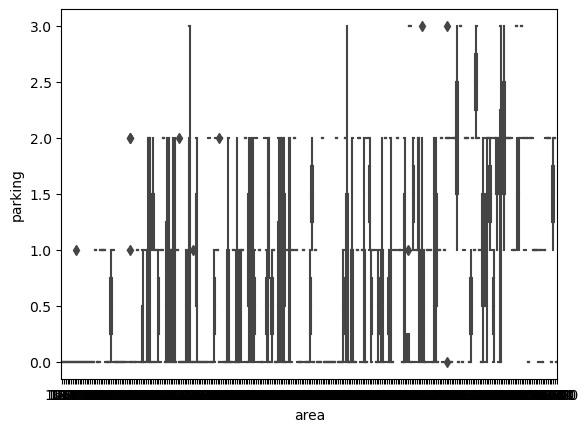

In [31]:
#Plotting Box plot for the numerical variables
for y in numerical_variables:
    sns.boxplot(y=y, x="area", data=df)
    plt.show()

In [32]:
categorical_variables


['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'furnishingstatus']

In [33]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the categorical variables

# Categorical variables
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Print the encoded DataFrame
print(df_encoded.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2            0   
1  12250000  8960         4          4        4        3            0   
2  12250000  9960         3          2        2        2            0   
3  12215000  7500         4          2        2        3            0   
4  11410000  7420         4          1        2        2            0   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0             1             1              0            1             0   
1             1             1              0            1             0   
2             1             1              0            0             1   
3             1             1              0            0             1   
4             1             0              1            0             1   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                   1                    0  

In [34]:
import plotly.express as px

map = px.scatter_mapbox(df,
                        lat='bedrooms',
                        lon='bathrooms',
                        color='price',
                        size='area',
                        zoom=4,
                        height=1000)
map.update_layout(mapbox_style='open-street-map')
map.show()


In [37]:
#Building the Model
#REGRESSION USING LINEAR REGRESSION 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
feature_columns = ['bedrooms',  'bathrooms','stories', 'area'] 
X = df[feature_columns]
target_column =  ['parking']  
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred= linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
rmse=np.sqrt(mse)
rmsle=np.log(rmse)
print("The Root Mean Squared Log Error is :", rmsle)

The Root Mean Squared Log Error is : -0.2037150331623436


In [38]:
#REGRESSION USING SVM
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set: 0.61

The confusion Matrix is : 
 [[89  0  5  0]
 [31  0  8  0]
 [17  0 11  0]
 [ 1  0  2  0]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.64      0.95      0.77        94
           1       0.00      0.00      0.00        39
           2       0.42      0.39      0.41        28
           3       0.00      0.00      0.00         3

    accuracy                           0.61       164
   macro avg       0.27      0.33      0.29       164
weighted avg       0.44      0.61      0.51       164



In [39]:
#REGRESSION USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of Random Forest classifier on test set: 0.46

The confusion Matrix is : 
 [[58 16 18  2]
 [20 11  8  0]
 [11  8  7  2]
 [ 0  2  1  0]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.65      0.62      0.63        94
           1       0.30      0.28      0.29        39
           2       0.21      0.25      0.23        28
           3       0.00      0.00      0.00         3

    accuracy                           0.46       164
   macro avg       0.29      0.29      0.29       164
weighted avg       0.48      0.46      0.47       164



In [41]:

#REGRESSION USING K-NEAREST NEIGHBOR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of K-nearest Neighbor classifier on test set:', accuracy)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of K-nearest Neighbor classifier on test set: 0.5304878048780488

The confusion Matrix is : 
 [[66 18 10  0]
 [23 12  4  0]
 [12  7  9  0]
 [ 0  2  1  0]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.65      0.70      0.68        94
           1       0.31      0.31      0.31        39
           2       0.38      0.32      0.35        28
           3       0.00      0.00      0.00         3

    accuracy                           0.53       164
   macro avg       0.33      0.33      0.33       164
weighted avg       0.51      0.53      0.52       164

